<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: преподаватель Факультета Компьютерных Наук ВШЭ <br> Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание 2. <br> Анализ данных по перелетам между городами США в 2008 году с помощью Pandas и Seaborn</center>

In [1]:
# Python 2 and 3 compatibility
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
%pylab inline
#import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


Скачайте и распакуте следующий [архив](http://stat-computing.org/dataexpo/2009/2008.csv.bz2) (~ 114 Mb, при разархивации - ~ 690 Mb). Описание полей таблицы дано [здесь](http://www.transtats.bts.gov/Fields.asp?Table_ID=236).
Данные  содержат перелеты между аэропортами США в 2008 году.

**Считаем данные в память в объект Pandas.DataFrame (это может занять пару минут).**

In [2]:
flights_df = pd.read_csv('../../data/flights_2008.csv.bz2')

In [3]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 29)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [4]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
CRSDepTime,1955,735,620,930,1755
ArrTime,2211,1002,804,1054,1959
CRSArrTime,2225,1000,750,1100,1925
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920


In [5]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,1333.830046,478.068895,1.0,928.0,1325.0,1728.0,2400.0
CRSDepTime,7009728.0,1326.085663,464.250911,0.0,925.0,1320.0,1715.0,2359.0
ArrTime,6858079.0,1481.258227,505.225129,1.0,1107.0,1512.0,1909.0,2400.0
CRSArrTime,7009728.0,1494.801154,482.672822,0.0,1115.0,1517.0,1907.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ActualElapsedTime,6855029.0,127.322424,70.187308,12.0,77.0,110.0,157.0,1379.0


**Число уникальных рейсов:**

In [6]:
flights_df['FlightNum'].nunique()

7539

**Мы можем выполнять группировки для расчета различных аггрегированных статистик.**

**Найдем топ-3 рейсов, совершивших самые длинные перелеты за 2008 год.**

In [7]:
flights_df.groupby('FlightNum')['Distance']\
  .sum().sort_values(ascending=False)\
  .iloc[0:3]

FlightNum
1     7793942
15    7639878
2     6888300
Name: Distance, dtype: int64

**Или так:**

In [8]:
flights_df.groupby('FlightNum')\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': {'_total': np.sum}})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Cancelled     Distance               
             _total         mean      sum count
FlightNum                                      
1                42  1925.380929  7793942  4048
15               51  1823.795178  7639878  4189
2                53  1873.347838  6888300  3677

**Построение сводной таблицы:**

In [9]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**Бывает удобно "раскрашивать" такие сводные таблицы:**

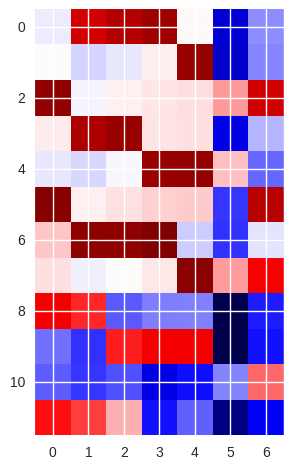

In [10]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic',interpolation='none')

**Гистограмма длин перелетов.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c908fb208>]], dtype=object)

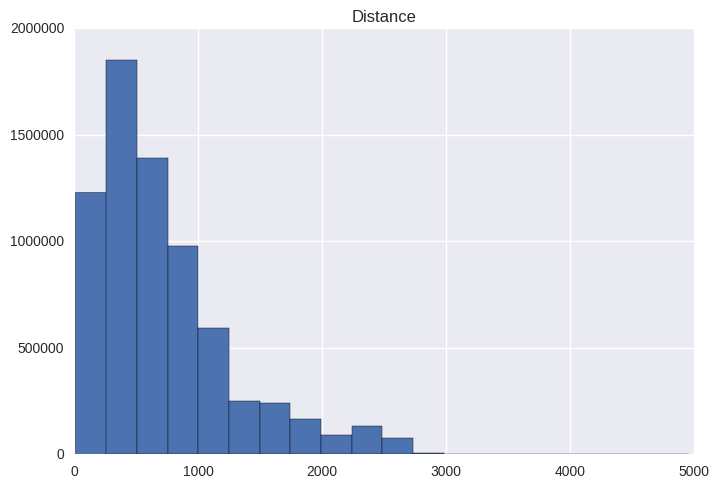

In [11]:
flights_df.hist('Distance', bins=20)

**Гистограмма частот перелетов в зависимости от даты.**

In [12]:
flights_df['Date'] = pd.to_datetime(flights_df.Year*10000 + 
                                    flights_df.Month*100 + 
                                    flights_df.DayofMonth, 
                            format='%Y%m%d')

In [13]:
num_flights_by_date = flights_df.groupby('Date')['FlightNum'].agg('count')

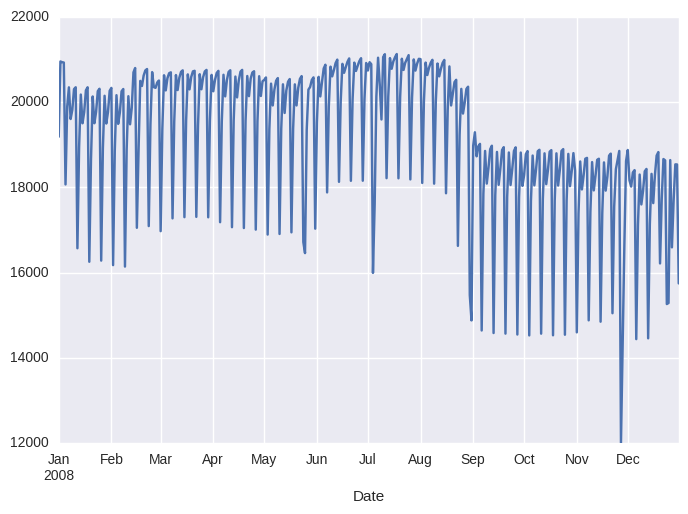

In [14]:
num_flights_by_date.plot()

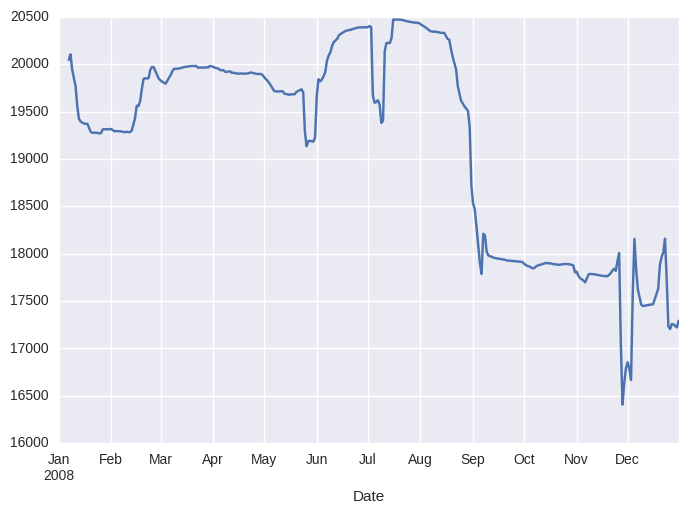

In [15]:
pd.rolling_mean(num_flights_by_date, 7).plot()

**1. Найдите топ-10 массовых перевозчиков (UniqueCarrier).**

In [16]:
flights_df.groupby('UniqueCarrier')\
        .size()\
        .sort_values(ascending=False)\
        .reset_index()\
        .rename(index=str, columns={0: 'Count'})\
        .head(10)    

,UniqueCarrier,Count
0,WN,1201754
1,AA,604885
2,OO,567159
3,MQ,490693
4,US,453589
5,DL,451931
6,UA,449515
7,XE,374510
8,NW,347652
9,CO,298455


**2. Постройте распределение причин отмены рейсов (CancellationCode).**

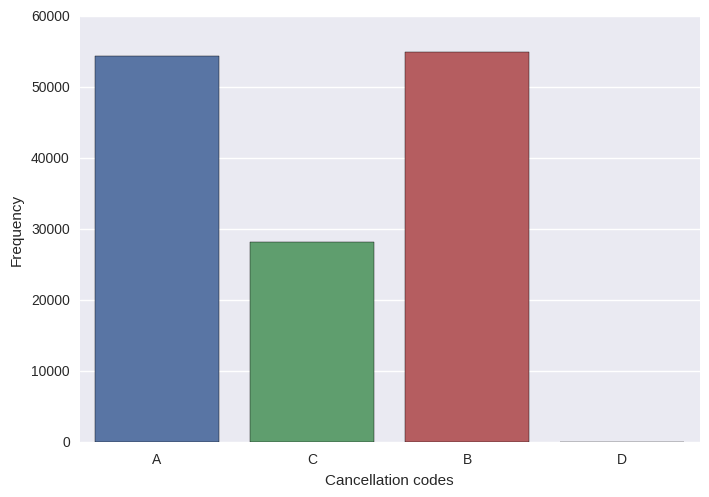

In [17]:
ax = sns.countplot(x='CancellationCode', data=flights_df)
ax.set(xlabel='Cancellation codes', ylabel='Frequency');

**3. Найдите самый популярный маршрут, отобразите статистику по данному маршруту (просто describe для подвыборки).**

In [18]:
most_popular_num = flights_df['FlightNum'].value_counts(sort=True, ascending=False)
print('Самый популярный рейс: {}, всего вылетов: {}'.format(most_popular_num.index[0], most_popular_num.values[0]))
flights_df[flights_df['FlightNum'] == most_popular_num.index[0]].describe().T

Самый популярный рейс: 152, всего вылетов: 4883


,count,mean,std,min,25%,50%,75%,max
Year,4883.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,4883.0,6.595331,3.281120,1.0,4.0,7.0,9.0,12.0
DayofMonth,4883.0,15.775138,8.804317,1.0,8.0,16.0,23.0,31.0
DayOfWeek,4883.0,3.929552,1.988999,1.0,2.0,4.0,6.0,7.0
DepTime,4792.0,1396.742279,345.225419,607.0,1143.0,1405.0,1630.0,2346.0
CRSDepTime,4883.0,1387.552324,337.850803,615.0,1135.0,1407.0,1620.0,2140.0
ArrTime,4761.0,1502.470489,539.501477,1.0,1250.0,1619.0,1829.0,2400.0
CRSArrTime,4883.0,1511.540242,529.125763,1.0,1245.0,1623.0,1831.0,2353.0
FlightNum,4883.0,152.000000,0.000000,152.0,152.0,152.0,152.0,152.0
ActualElapsedTime,4761.0,137.143037,75.864227,29.0,73.0,109.0,212.0,347.0


**4. Найдите топ-5 рейсов (по числу полетов) по каждому из типов задержек рейсов. Каким перевозчикам они принадлежат?**

In [19]:
for code, sub_df in flights_df.groupby(['CancellationCode']):
    top5 = sub_df['FlightNum'].value_counts(sort=True, ascending=False).head(5)
    top5_flight_num = top5.index.values
    carriers_of_top5 = sub_df[sub_df['FlightNum'].isin(top5_flight_num)]['UniqueCarrier'].value_counts()
    print('Top-5 рейсов по типу задержки "{}" и количество задержек по перевозчикам:'.format(code))
    top5_df = pd.DataFrame(top5.values, 
                   index=[top5.index.values], 
                   columns=['Total']).rename_axis('FlightNum')
    
    for carrier in carriers_of_top5.index:
        top5_df[carrier] = [0 for _ in range(5)]
        
    for flight_num in top5_df.index.values:
        for carrier in carriers_of_top5.index:
            top5_df.at[flight_num, carrier] = \
                len(sub_df[(sub_df['FlightNum'] == flight_num) & (sub_df['UniqueCarrier'] == carrier)])           
                
    display(top5_df.T)

Top-5 рейсов по типу задержки "A" и количество задержек по перевозчикам:


FlightNum,16,151,806,64,152
Total,64,59,59,56,53
AS,0,18,3,33,26
UA,0,32,28,5,7
WN,40,1,2,9,0
AA,11,0,13,0,0
US,8,0,1,3,6
DL,0,5,8,0,1
HA,0,0,0,0,12
FL,0,1,3,6,1
B6,2,0,1,0,0


Top-5 рейсов по типу задержки "B" и количество задержек по перевозчикам:


FlightNum,1115,7098,7151,1114,64
Total,70,54,54,53,52
YV,0,54,54,0,0
CO,49,0,0,46,0
WN,15,0,0,3,15
AS,0,0,0,0,30
B6,0,0,0,0,6
AA,6,0,0,0,0
DL,0,0,0,2,0
UA,0,0,0,2,0
FL,0,0,0,0,1


Top-5 рейсов по типу задержки "C" и количество задержек по перевозчикам:


FlightNum,5961,5886,6153,5946,5944
Total,82,73,69,69,65
OO,82,73,69,68,61
9E,0,0,0,1,4


Top-5 рейсов по типу задержки "D" и количество задержек по перевозчикам:


FlightNum,3631,3694,4285,299,202
Total,1,1,1,1,1
AA,0,0,0,1,1
MQ,1,1,0,0,0
EV,0,0,1,0,0


**5. Определите, как распределено количество рейсов в зависимости от времени дня?**

In [20]:
def hhmm_converter(hhmm):
    hh = hhmm // 100
    mm = hhmm - hh * 100
    return hh, mm
def hh_cat(hhmm):
    hh, _ = hhmm_converter(hhmm)
    if 0 <= hh <= 6:
        return 'night'
    elif 6 < hh <= 12:
        return 'morning'
    elif 12 < hh <= 18:
        return 'afternoon'
    elif 18 < hh <= 24:
        return 'evening'
def hhmm_in_minutes(hhmm): 
    hh, mm = hhmm_converter(hhmm)
    return hh * 60 + mm
def hhmm_in_hour(hhmm): 
    hh, mm = hhmm_converter(hhmm)
    return hh + mm/60
    
flights_df['CRSDepTimeCat'] = flights_df['CRSDepTime'].apply(hh_cat)
flights_df['CRSDepTimeInMin'] = flights_df['CRSDepTime'].apply(hhmm_in_minutes)
flights_df['CRSDepTimeInHour'] = flights_df['CRSDepTime'].apply(hhmm_in_hour)


** Гистограмма количества и частот перелетов в зависимости от времени дня (утро, день, вечер, ночь).**

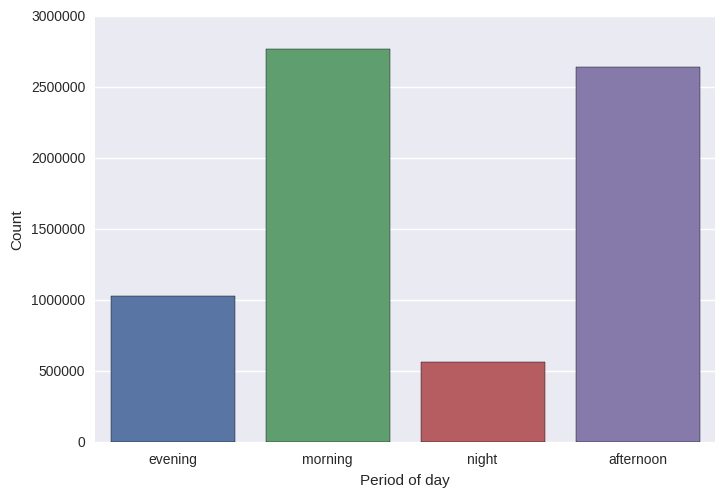

In [21]:
ax = sns.countplot(x='CRSDepTimeCat', data=flights_df)
ax.set(xlabel='Period of day', ylabel='Count');

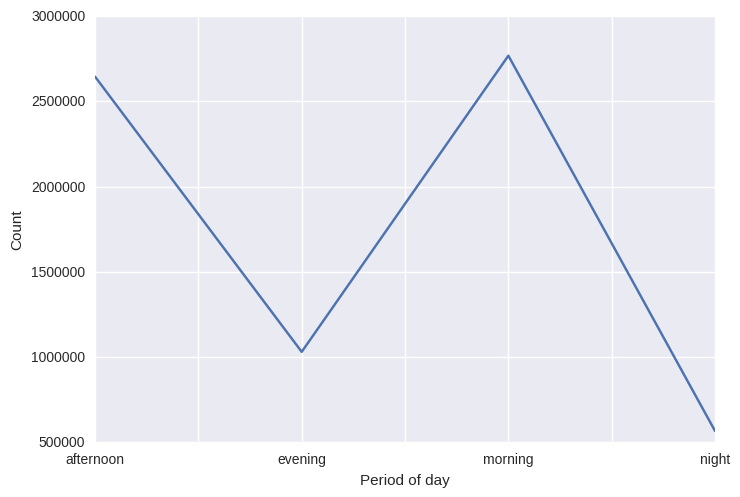

In [22]:
num_flights_by_day_cat = flights_df.groupby('CRSDepTimeCat')['FlightNum'].agg('count')
ax = num_flights_by_day_cat.plot();
ax.set(xlabel='Period of day', ylabel='Count');

**Гистограмма частот перелетов в зависимости от времени дня (поминутно).**

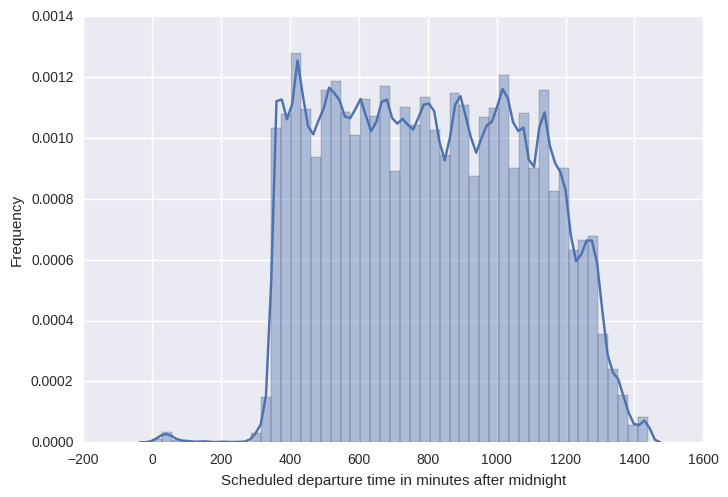

In [23]:
ax = sns.distplot(flights_df['CRSDepTimeInMin'], kde=True)
ax.set(xlabel='Scheduled departure time in minutes after midnight', ylabel='Frequency');

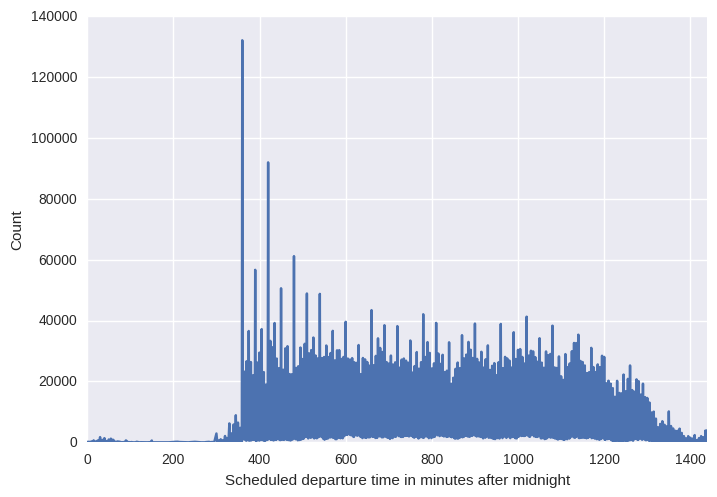

In [24]:
num_flights_by_hhmm = flights_df.groupby('CRSDepTimeInMin')['FlightNum'].agg('count')
ax = num_flights_by_hhmm.plot();
ax.set(xlabel='Scheduled departure time in minutes after midnight', ylabel='Count');

**Гистограмма частот перелетов в зависимости от времени дня (по часам).**

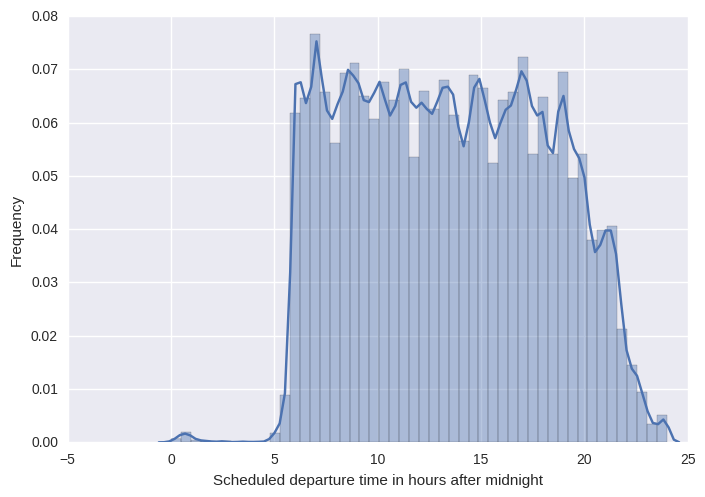

In [25]:
ax = sns.distplot(flights_df['CRSDepTimeInHour'], kde=True)
ax.set(xlabel='Scheduled departure time in hours after midnight', ylabel='Frequency');

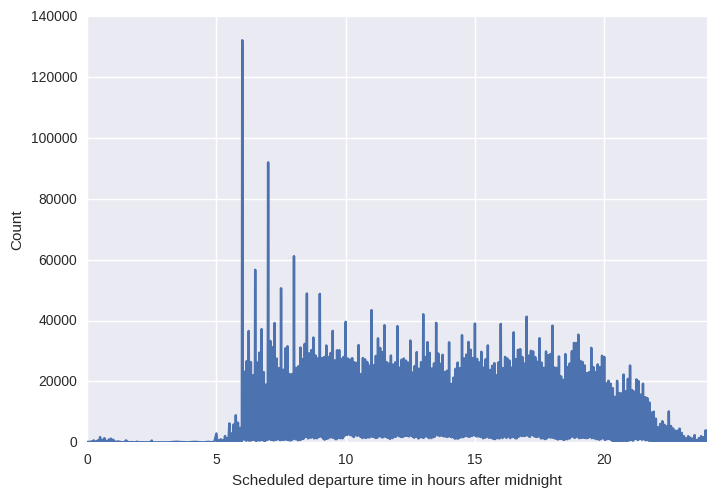

In [26]:
num_flights_by_hh = flights_df.groupby('CRSDepTimeInHour')['FlightNum'].agg('count')
ax = num_flights_by_hh.plot()
ax.set(xlabel='Scheduled departure time in hours after midnight', ylabel='Count');

**Гистограмма частот перелетов в зависимости от даты для утренних рейсов.**

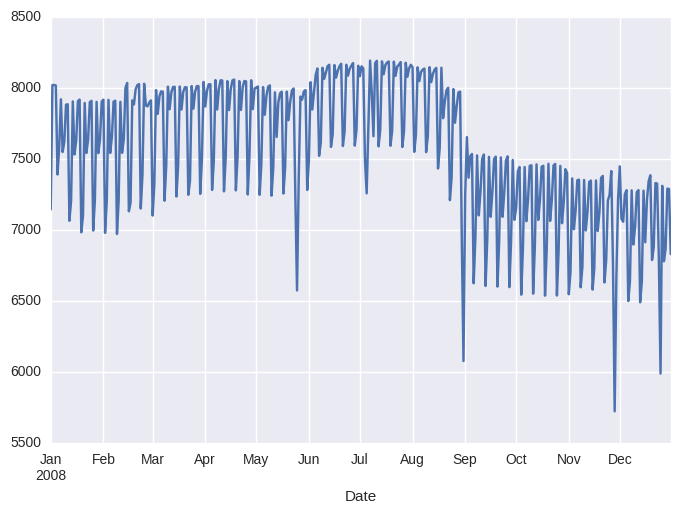

In [27]:
flights_df.groupby('CRSDepTimeCat').get_group('morning').groupby('Date')['FlightNum'].agg('count').plot();

**Гистограмма частот перелетов в зависимости от даты для дневных рейсов.**

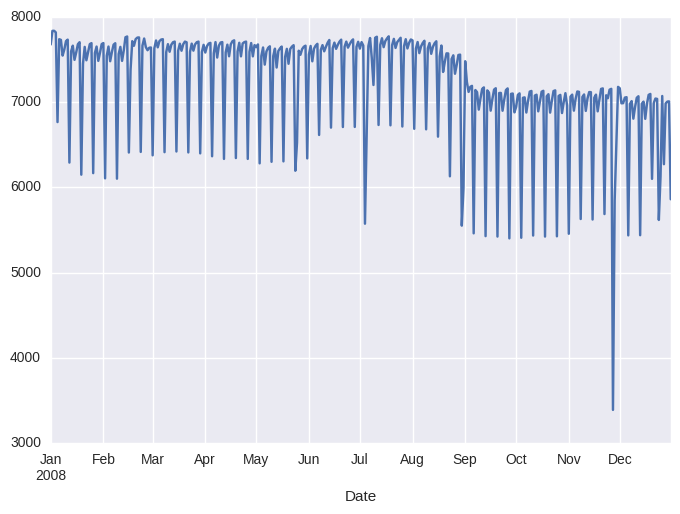

In [28]:
flights_df.groupby('CRSDepTimeCat').get_group('afternoon').groupby('Date')['FlightNum'].agg('count').plot()

**Гистограмма частот перелетов в зависимости от даты для вечерних рейсов.**

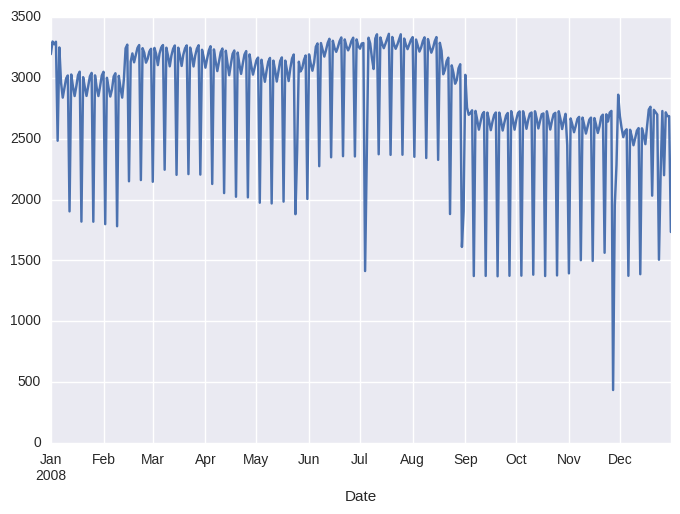

In [29]:
flights_df.groupby('CRSDepTimeCat').get_group('evening').groupby('Date')['FlightNum'].agg('count').plot();

**Гистограмма частот перелетов в зависимости от даты для ночных рейсов.**

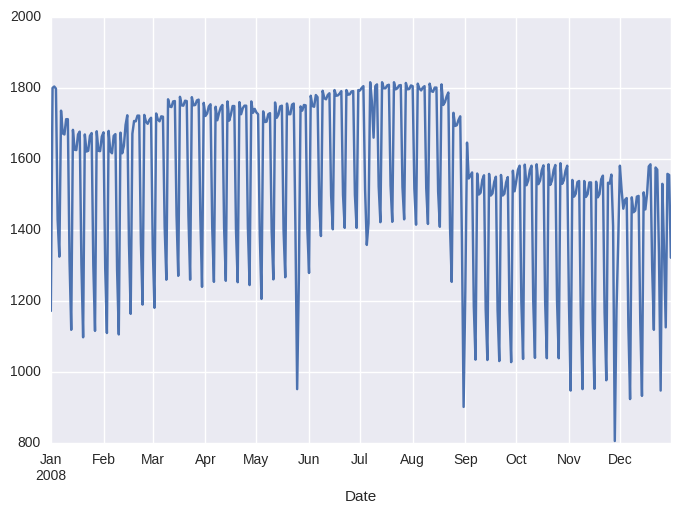

In [30]:
flights_df.groupby('CRSDepTimeCat').get_group('night').groupby('Date')['FlightNum'].agg('count').plot();

In [31]:
max_fly_time_in_min = num_flights_by_hhmm.sort_values(ascending=False).head(1).index.values[0]
max_fly_time = datetime.time(max_fly_time_in_min // 60, max_fly_time_in_min - max_fly_time_in_min // 60*60)
max_fly_count = num_flights_by_hhmm.sort_values(ascending=False).head(1).values[0]

print('Утром и днём намного больше вылетов, чем вечером и ночью.')
print('Самый пик приходится на "{}": {} вылетов за всё время.'.format(max_fly_time.strftime('%H:%M'), max_fly_count))


Утром и днём намного больше вылетов, чем вечером и ночью.
Самый пик приходится на "06:00": 132059 вылетов за всё время.


**6. Опишите, как число полетов меняется во времени (по дням/неделям/месяцам), и проинтерпретируйте.**

**Гистограмма частот перелетов в зависимости от дня недели. **

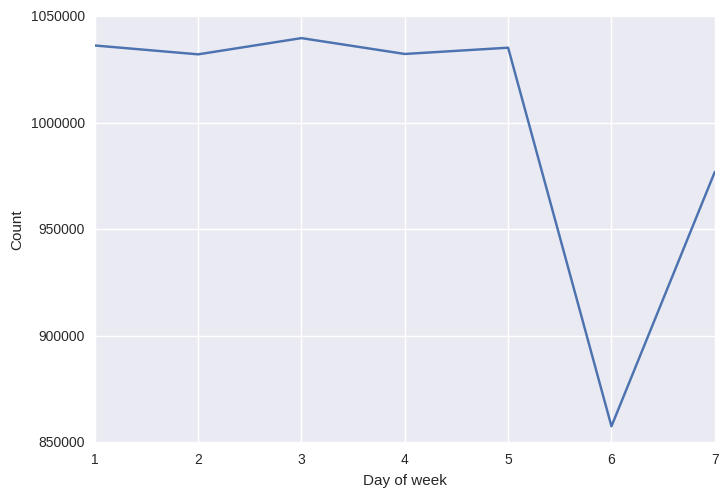

In [32]:
ax = flights_df.groupby('DayOfWeek')['FlightNum'].agg('count').plot();
ax.set(xlabel='Day of week', ylabel='Count');

Резкое падение количества полетов в субботу. Не могу понять, почему :(

**Гистограмма частот перелетов в зависимости от недели в месяце. **

In [33]:
flights_df['WeekofMonth'] = flights_df['DayofMonth'].apply(lambda dom: (dom - 1) // 7 + 1)

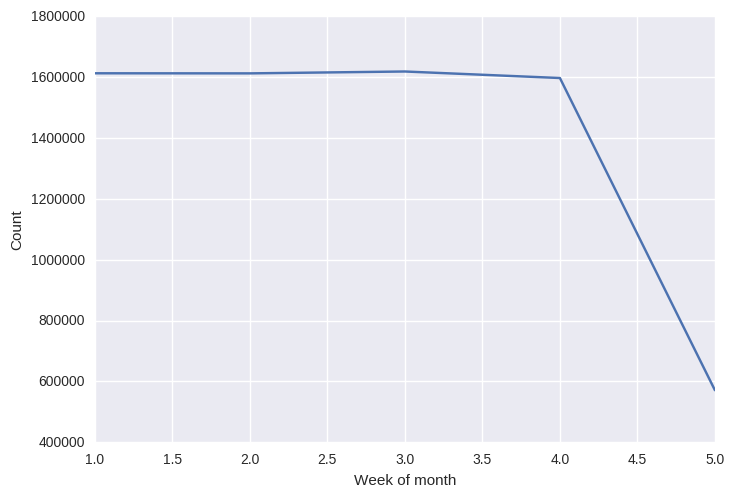

In [34]:
ax = flights_df.groupby('WeekofMonth')['FlightNum'].agg('count').plot()
ax.set(xlabel='Week of month', ylabel='Count');

Нет зависимости от недели в месяце. Падение в 5-й неделе объясняется тем, что она на 4 дня.

**Гистограмма частот перелетов в зависимости от дня в месяце.**

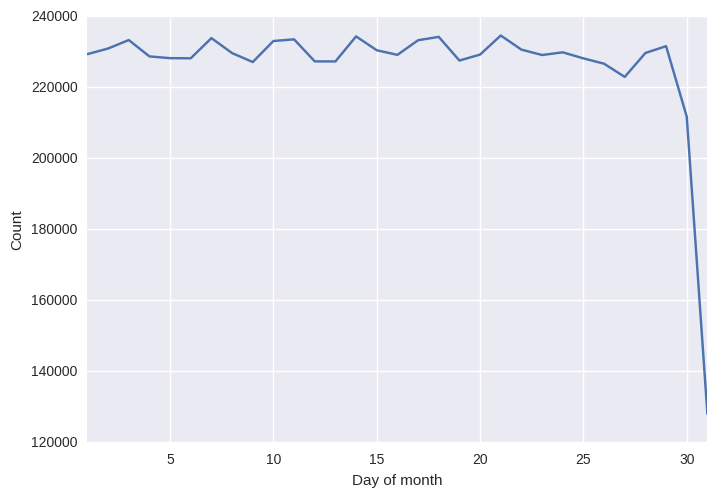

In [35]:
ax = flights_df.groupby('DayofMonth')['FlightNum'].agg('count').plot();
ax.set(xlabel='Day of month', ylabel='Count');

Нет сильной зависимости от дня месяца. Перепады вызваны спадом количества полетов по субботам. Падение в 31-го скорее всего объясняется отсутствием 31-го числа 5 раз в году